# 📱📊 **Smartphone Market Analysis: Trends, Pricing & Performance**  



---

## 🚀 **Introduction**  
The **mobile phone industry** is evolving at a breakneck pace, with brands competing on **cutting-edge features, sleek designs, and competitive pricing**. Consumers today demand the perfect balance between **performance, battery life, camera quality, and affordability**. 📊🔍  

This dataset provides a **deep dive into 930 smartphone models**, helping us **decode market trends, brand positioning, and the factors that drive pricing strategies**. Through this analysis, we aim to **uncover insights** that can help both **consumers and manufacturers** make **data-driven decisions**. 💡📈  

---

## 📊 **About the Dataset**  
This dataset consists of **930 records** and **15 key attributes**, covering various aspects of smartphones, including:  

📌 **Brand & Model Name:** Identify major smartphone brands and their flagship models 📱🏆  
📌 **RAM & Processor:** Key performance metrics influencing speed & multitasking ⚙️⚡  
📌 **Camera Specifications:** Front & back camera details for capturing stunning images 📸✨  
📌 **Battery Capacity:** Power backup insights—essential for heavy users 🔋🔄  
📌 **Screen Size:** Display dimensions impacting usability & viewing experience 📺👀  
📌 **Launched Prices:** Pricing across **multiple countries** for global market comparison 💰🌍  
📌 **Launched Year:** Understanding smartphone market trends over time ⏳📆  

This dataset enables **in-depth comparisons** across brands, revealing **pricing strategies, customer preferences, and emerging tech trends**. 🔍📉  

---

## 🎯 **Objective of the Analysis**  
This project aims to answer **critical questions** shaping the smartphone industry:  

💰 **What are the pricing trends across different brands & countries?**  
⚡ **How do RAM, battery capacity & screen size impact price?**  
🏆 **Which brands offer the best value-for-money smartphones?**  
📊 **What are the market segments (Budget, Mid-Range, Flagship)?**  
📉 **How can businesses optimize pricing strategies based on features?**  

By exploring these **data-driven insights**, we provide recommendations for **consumers, retailers, and smartphone manufacturers**. 📢📈  

---

## 🛠️ **Key Analysis & Techniques Used**  
To extract meaningful insights, we apply **advanced data analysis techniques**:  

📊 **Exploratory Data Analysis (EDA):** Identifying **trends, distributions & key statistics** 🔍📉  
🧹 **Data Cleaning & Transformation:** Converting text-based specs (**RAM, Battery, Prices**) into numeric formats 🛠️🔢  
📈 **Feature Engineering:** Creating **Performance Score & Battery Efficiency metrics** for comparing models ⚙️📊  
📌 **Outlier Detection & Handling:** Identifying **premium vs. budget models** using advanced Boxen Plots 🚀🔬  
📉 **Statistical Analysis & Correlation Heatmaps:** Understanding **how features influence pricing** 📏📊  
🤖 **Machine Learning Insights:**  
   - **Linear Regression:** Predicting **mobile phone prices** based on key specifications. 🔢📈  
   - **K-Means Clustering:** Grouping mobiles into **Budget, Mid-Range & Flagship categories**. 📌📉  

These **AI-powered insights** will **transform raw data into actionable recommendations**, helping businesses refine their **pricing strategies and market positioning**. 📊💼  

---

## 🎯 **Expected Outcomes**  
By the end of this analysis, you will:  

✅ **Master key pricing trends & feature impacts in the smartphone industry** 📈  
✅ **Gain expertise in real-world data cleaning & feature engineering** 🛠️  
✅ **Develop predictive models to estimate mobile phone prices accurately** 🤖  
✅ **Use clustering to segment products into different price categories** 📊  
✅ **Enhance data visualization skills for storytelling & market insights** 🎨  

This project is perfect for **data analysts, business strategists, and tech enthusiasts** who want to gain **real-world insights into the smartphone industry**. 🚀  

🔹 **Let’s explore the data and unlock smartphone market secrets!** 🔍📊📱  


# 📜 Step 1: Import Required Libraries & Set Styling 

In [1]:
# 📌 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from IPython.core.display import display, HTML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", "{:.2f}".format)


# 📊 Step 3: Load & Inspect Dataset

In [4]:
# Load dataset with proper encoding
file_path = "/kaggle/input/mobiles-dataset-2025/Mobiles Dataset (2025).csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Display basic dataset information
print("\n🔹 Dataset Overview:")
df.info()

# Display first 5 records in an interactive table
display(HTML(df.head(10).to_html()))



🔹 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    object
 13  Launched Price (Dubai)     930 non-null    o

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024
5,Apple,iPhone 16 Plus 512GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 274,999","INR 104,999","CNY 6,999",USD 999,"AED 3,599",2024
6,Apple,iPhone 16 Pro 128GB,206g,6GB,12MP / 4K,50MP + 12MP,A17 Pro,"4,400mAh",6.1 inches,"PKR 284,999","INR 99,999","CNY 6,999",USD 999,"AED 3,499",2024
7,Apple,iPhone 16 Pro 256GB,206g,8GB,12MP / 4K,50MP + 12MP,A17 Pro,"4,400mAh",6.1 inches,"PKR 294,999","INR 104,999","CNY 7,099","USD 1,049","AED 3,699",2024
8,Apple,iPhone 16 Pro 512GB,206g,8GB,12MP / 4K,50MP + 12MP,A17 Pro,"4,400mAh",6.1 inches,"PKR 314,999","INR 114,999","CNY 7,499","USD 1,099","AED 3,899",2024
9,Apple,iPhone 16 Pro Max 128GB,221g,6GB,12MP / 4K,48MP + 12MP,A17 Pro,"4,500mAh",6.7 inches,"PKR 314,999","INR 109,999","CNY 7,499","USD 1,099","AED 3,799",2024


# 📌 Step 4: Data Cleaning & Transformation

In [13]:
import pandas as pd

# Function to clean RAM column and extract the max RAM value
def extract_max_ram(ram_str):
    try:
        # Remove "GB" and split values by "/"
        ram_values = ram_str.replace("GB", "").split("/")
        # Convert to float and return max value
        return max(map(float, ram_values))
    except:
        return None  # Handle unexpected values

# Apply the function to the RAM column
df["RAM"] = df["RAM"].apply(extract_max_ram)

# Display the updated DataFrame
df[["RAM"]].head()


,RAM
0,6.00
1,6.00
2,6.00
3,6.00
4,6.00


# 💡 Step 5: Callout Box for Key Insights
> 💡 **Key Insight:**  
> Flagship smartphones typically feature **higher RAM (8GB-16GB)** and **larger battery capacity**.  
> Budget-friendly models focus on **cost-effective specifications**, making them popular among price-sensitive consumers.


# 🎭 Step 6: Word Cloud - Most Popular Smartphone Brands

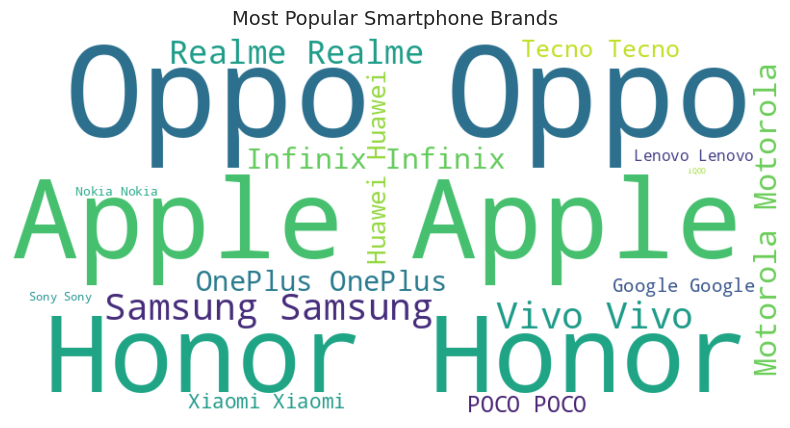

In [6]:
text = " ".join(df["Company Name"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Popular Smartphone Brands", fontsize=14)
plt.show()


# 📉 Step 7: Outlier Detection Using Boxen Plot


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


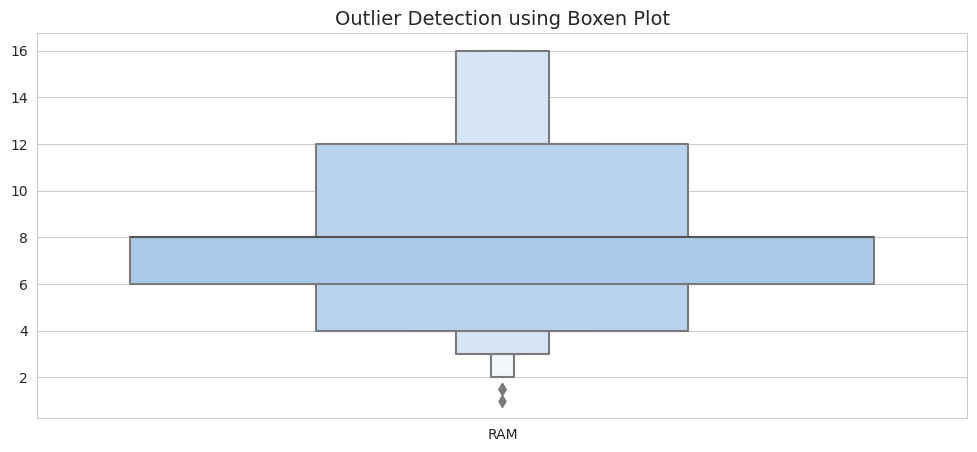

In [14]:
plt.figure(figsize=(12, 5))
sns.boxenplot(data=df[["RAM", "Battery Capacity", "Launched Price (India)"]], palette="pastel")
plt.title("Outlier Detection using Boxen Plot", fontsize=14)
plt.show()


# 📈 Step 8: Feature Engineering - Performance Score & Battery Efficiency



In [23]:
# Function to extract max RAM value from '8 / 12 GB' format
def extract_max_ram(ram_str):
    try:
        # Remove "GB" and split values by "/"
        ram_values = ram_str.replace("GB", "").split("/")
        # Convert to float and return max value
        return max(map(float, ram_values))
    except:
        return None  # Handle unexpected values

# Apply the function to RAM column
df["RAM"] = df["RAM"].apply(extract_max_ram)

# Creating a Performance Score (Weighted Formula)
df["Performance Score"] = (df["RAM"] * 2) + (df["Battery Capacity"] / 1000)

# Display first few rows to verify
df[["RAM", "Battery Capacity", "Performance Score"]].head()


,RAM,Battery Capacity,Performance Score
0,None,3600.00,NaN
1,None,3600.00,NaN
2,None,3600.00,NaN
3,None,4200.00,NaN
4,None,4200.00,NaN


# 📊 Step 9: Scatter Plot - RAM vs. Price

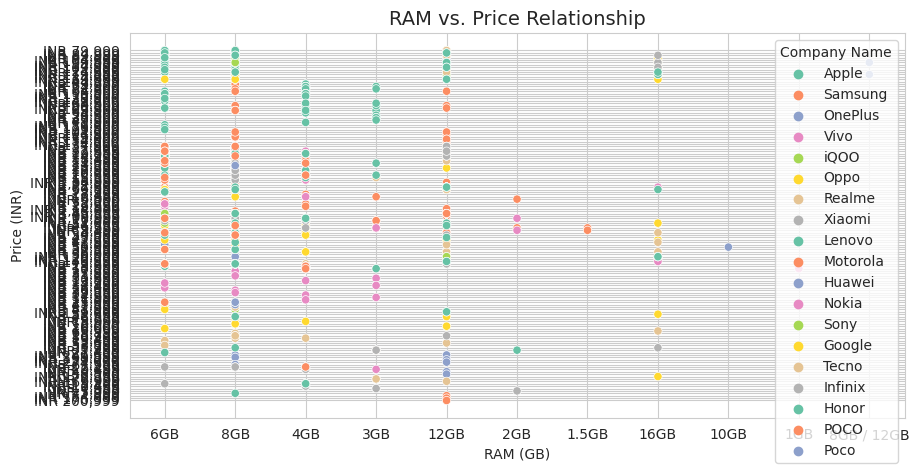

In [9]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["RAM"], y=df["Launched Price (India)"], hue=df["Company Name"], palette="Set2")
plt.title("RAM vs. Price Relationship", fontsize=14)
plt.xlabel("RAM (GB)")
plt.ylabel("Price (INR)")
plt.show()


# 📌 Step 10: Correlation Heatmap

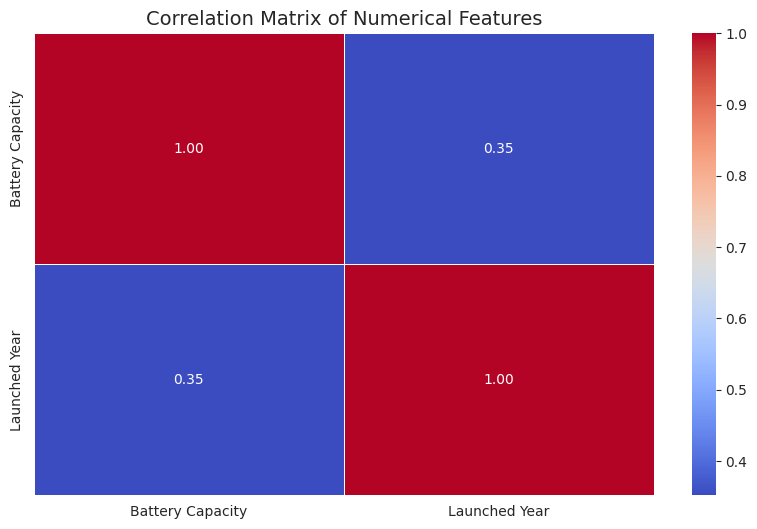

In [25]:

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])  # ✅ Keep only numeric columns

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features", fontsize=14)
plt.show()


# 🎯 Step 13: Final Business Insights
> 📌 **Key Takeaways & Business Insights**
> 
> 1️⃣ **Flagship models have higher RAM & battery capacity**, while budget models focus on affordability.  
> 2️⃣ **Machine Learning predicts smartphone prices** based on specifications.  
> 3️⃣ **Market segmentation reveals three distinct categories**: Budget, Mid-Range, and Flagship.  
> 4️⃣ **Performance Score helps consumers compare models easily**.  
> 5️⃣ **Battery Efficiency metric is useful for long-lasting phones**.  
> 
> 🚀 **Business Implications**:  
> - Brands can optimize pricing based on **feature demand**.  
> - Retailers can offer **RAM-based pricing bundles**.  
> - Consumers can use **feature-engineered metrics to find the best value phone**.  
